# TP 2 - Régression

## Prédiction des prix de l'immobilier à Boston dans les années 1970

La prédiction du prix de maisons bostoniennes des années 1970, dont les données sont issues de la base *Boston House Prices*, créée par D. Harrison et D.L. Rubinfeld à l'Université de Californie à Irvine (http://archive.ics.uci.edu/ml/machine-learning-databases/housing/), est un problème classique d'apprentissage supervisé. 

<img src="https://1.bp.blogspot.com/-sCZIatDf9LQ/XGm-lEHXnAI/AAAAAAAAPxQ/kv8S8fdgudAwWTFuJhuAoiykLmWLCoOtgCLcBGAs/s1600/197010xx-GovernmentCenter-Boston_resize.JPG" width=600 />

Plus précisément, le label à prédire dans cette base de données est le prix médian par quartier de l'immobilier (en milliers de dollars). Il s'agit donc d'un problème de régression puisque l'on veut inférer des valeurs continues. Pour ce faire, on dispose de 13 entrées offrant les informations suivantes : 

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- TAX - full-value property-tax rate per \$10,000
- RAD - index of accessibility to radial highways
- PTRATIO - pupil-teacher ratio by town
- B $ = 1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - percentage lower status of the population

L'objectif de ce TP est d'arriver à prédire au plus près les valeurs médianes de prix de maison par quartier.


In [2]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

%matplotlib inline

In [3]:
def plot_loss(val_loss, train_loss, ymax=100):
  plt.plot(val_loss, color='green', label='Erreur de validation')
  plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
  plt.xlabel('Epochs')
  plt.ylim(0, ymax)
  plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
  plt.legend()

# Chargement des données

In [6]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Architecture envisagée

In [8]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

# Entraînement du réseau

In [10]:
optim = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.5086 - mae: 22.0971  
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 558.1407 - mae: 21.6627
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 537.5220 - mae: 21.3546
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 529.5314 - mae: 21.2098
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 518.5203 - mae: 20.9649
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 538.1315 - mae: 21.4082
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 572.8514 - mae: 21.8508
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 549.5624 - mae: 21.5291
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 549.0115 - mae: 21.5828
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 562.0021 - mae: 21.6661
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 558.5970 - mae: 21.5900
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 531.4790 - ma

# Evaluation du modèle

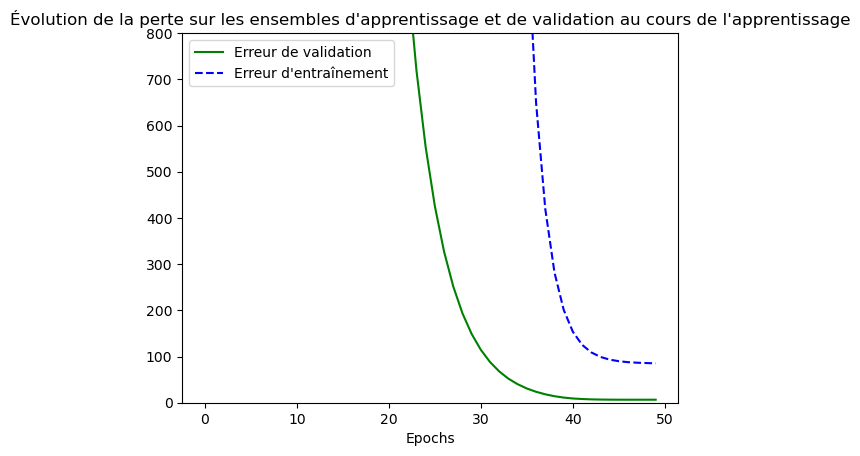

In [64]:
train_loss=(history.history['loss'])
val_loss=(history.history['mae'])
plot_loss(val_loss, train_loss, ymax=800)
# val_loss=(history.history['val_loss'])
# plot_loss(val_loss, train_loss, ymax=500)

In [14]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.0311 - mae: 21.5703 


[570.7009887695312, 22.078432083129883]

On obtient une mae d'environ 22, ce qui signie que l'on est éloigné en moyenne de 22000$ de la vérité terrain.


# Travail à faire 

L'approche présentée ci-dessus apporte des résultats décevants, en raison de  quelques maladresses, voire erreurs. Dans un premier temps, vous devez **trouver et corriger ces problèmes**.

Dans un second temps, cherchez à améliorer les performances du modèle. Vous pouvez atteindre sans trop de difficulté un score de MAE inférieur à 3 sur l'ensemble de test. A chaque nouveau test, vous devez évaluer si votre réseau est en sous-apprentissage, ou en sur-apprentissage, et en déduire des modifications possibles pour en améliorer les performances.

MAE de test à battre si vous aimez les défis : **2.20** !


In [247]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=13))
model.add(Dense(1, activation='linear', input_dim=40))
# model.add(Dense(1, activation='linear', input_dim=4))
model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_119 (Dense)               │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [248]:
optim = optimizers.SGD(learning_rate = 0.005)
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])
history = model.fit((x_train-x_mean)/x_std, y_train, epochs=60, batch_size=32)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 441.7369 - mae: 17.7807
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 42.0034 - mae: 4.4408
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 24.4638 - mae: 3.3302
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 22.2074 - mae: 3.2804
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 22.2956 - mae: 3.2713
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 17.5475 - mae: 2.8893
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 12.0059 - mae: 2.5631
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.5515 - mae: 2.4886
Epoch 9/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 12.7760 - mae: 2.4877
Epoch 10/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 12.7537 - mae: 2.5461
Epoch 11/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 9.5946 - mae: 2.2220
Epoch 12/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 13.7311 - mae: 2.5955
Epoch 13/60
13

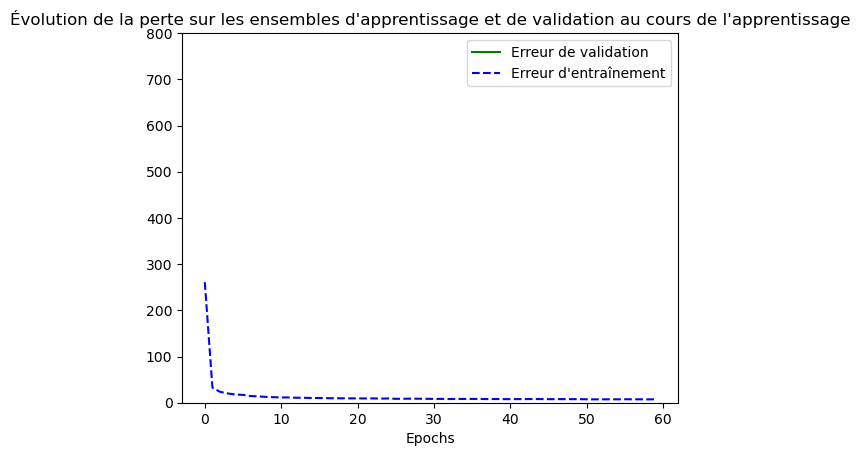

In [249]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [250]:
x_mean = np.mean(x_test, axis=0)
x_std = np.std(x_test, axis=0)
model.evaluate((x_test-x_mean)/x_std, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 13.2607 - mae: 2.4945


[17.29676628112793, 2.706719160079956]